In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tesser import cython_sr
from tesser import cython_fit
from tesser import util
import importlib

In [2]:
data_dir= "/mnt/e/Data"

In [3]:
induct_all = util.load_induct(data_dir)
struct_all = util.locd_struct(data_dir)

subj_filter = f'SubjNum == {138}'
induct_df = induct_all.query(subj_filter)
struct_df = struct_all.query(subj_filter)

n_states = len(np.unique(struct_df.objnum))

Find actual trasnsition matrix for each participant using strductred learning DataFrame.
* use objnum to create new matrix
* tally each object transition as a matrix index
* devide each row by the sum of the row
  *  each row must sum up to 1

In [4]:
df=struct_df.reset_index()
df =df.objnum
matrix = np.zeros([n_states, n_states])
for i, j in enumerate(df):
    try:
        matrix[j-1,df[i+1]-1] +=1
    except:
        KeyError
# print(matrix)
matrix[matrix == 0] = 0.0000001
# print(matrix)
for row in range(n_states):
    matrix[row] /= np.sum(matrix[row])


In [5]:
df=struct_df.reset_index()
df =df.objnum
matrix = np.zeros([n_states, n_states])
for i, j in enumerate(df):
    try:
        matrix[j-1,df[i+1]-1] +=1
    except:
        KeyError
# print(matrix)
matrix[matrix == 0] = 0.0000001
# print(matrix)
for row in range(n_states):
    matrix[row] /= np.sum(matrix[row])

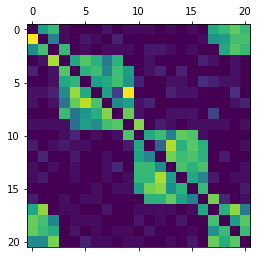

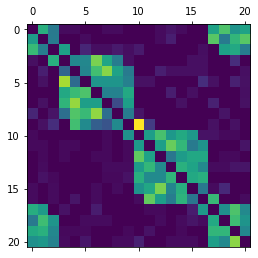

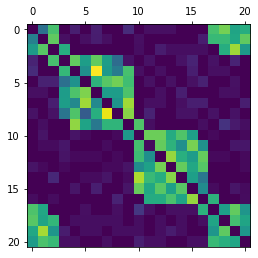

In [6]:
plt.matshow(matrix), plt.matshow(cython_sr.transition_indiv(util.load_struct_subject(data_dir,108),n_states));
plt.matshow(cython_sr.transition_all(struct_all,n_states)[101])

In [7]:
fixed = {}
var_names = ['gamma', 'alpha', 'tau', 'w']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10], 'w' : [0, 1]}
results = cython_fit.fit_induct_indiv(struct_all, induct_all, fixed, var_names, var_bounds,
                               n_states=n_states, verbose=False, model_type='true transitional', model=[])

Estimating parameters for 100...
Estimating parameters for 101...
Estimating parameters for 102...
Estimating parameters for 103...
Estimating parameters for 104...
Estimating parameters for 105...
Estimating parameters for 106...
Estimating parameters for 108...
Estimating parameters for 109...
Estimating parameters for 110...
Estimating parameters for 111...
Estimating parameters for 112...
Estimating parameters for 113...
Estimating parameters for 114...
Estimating parameters for 115...
Estimating parameters for 116...
Estimating parameters for 117...
Estimating parameters for 119...
Estimating parameters for 120...
Estimating parameters for 121...
Estimating parameters for 122...
Estimating parameters for 123...
Estimating parameters for 124...
Estimating parameters for 125...
Estimating parameters for 126...
Estimating parameters for 127...
Estimating parameters for 128...
Estimating parameters for 129...
Estimating parameters for 130...
Estimating parameters for 131...
Estimating

In [10]:
import importlib

In [13]:
importlib.reload(cython_fit)

<module 'tesser.cython_fit' from '/home/rodrigo/Documents/PrestonLab/code/tesser_successor/tesser/cython_fit.py'>

In [16]:
results=results.set_index('subject')

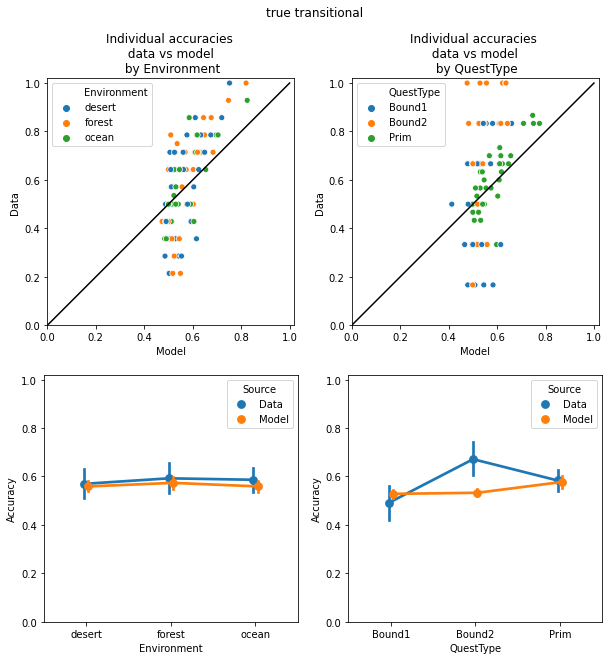

In [17]:
cython_fit.plot_by_question(struct_all, induct_all, results,
                            fig_name='true transitional',model_type= 'true transitional')

In [18]:
results

,gamma,alpha,tau,w,log_like
subject,,,,,
100,1.000000,1.000000,10.000000,0.523606,-27.912203
101,0.992612,0.726769,1.119411,1.000000,-25.324311
102,1.000000,0.017624,0.103204,0.430125,-20.864024
103,0.000058,0.998536,0.001406,0.999120,-24.410152
104,0.000000,1.000000,0.558111,1.000000,-27.130966
105,1.000000,0.133568,0.384930,1.000000,-23.354277
106,0.000000,0.279658,0.275460,0.467382,-55.918693
108,1.000000,0.657792,0.526851,0.085212,-28.379224
109,0.656049,0.032132,0.116435,1.000000,-20.332573
